### Walkthrough for Depth Reconstruction

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt

/home/workstationpatrick/anaconda3/envs/hndr/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
obj = "data_processed_patrick" # test object name
bundle = np.load("data/data_processed_patrick/frame_bundle.npz", allow_pickle=True)
depth = bundle['depth_{0}'.format(0)] # lidar depth in meters, numpy array
print(depth.shape)
# reprojected_lidar_depth = np.load("data/{0}/reprojected_lidar.npy".format(obj)) # point to reprojected lidar depth
model = torch.load("data/{0}/model.pt".format(obj), map_location="cpu") # point to location of trained model
model.args.device = "cpu" # perform reconstruction on cpu
model.ref_depth = torch.tensor(depth).float()[None, None] # use reprojected lidar depth as intialization

(256, 192)


In [12]:
qry, out = model.get_visualization(y_samples=256, x_samples=192) # set resolution, full resolution might require large memory
out = out.detach()
qry = qry.detach()

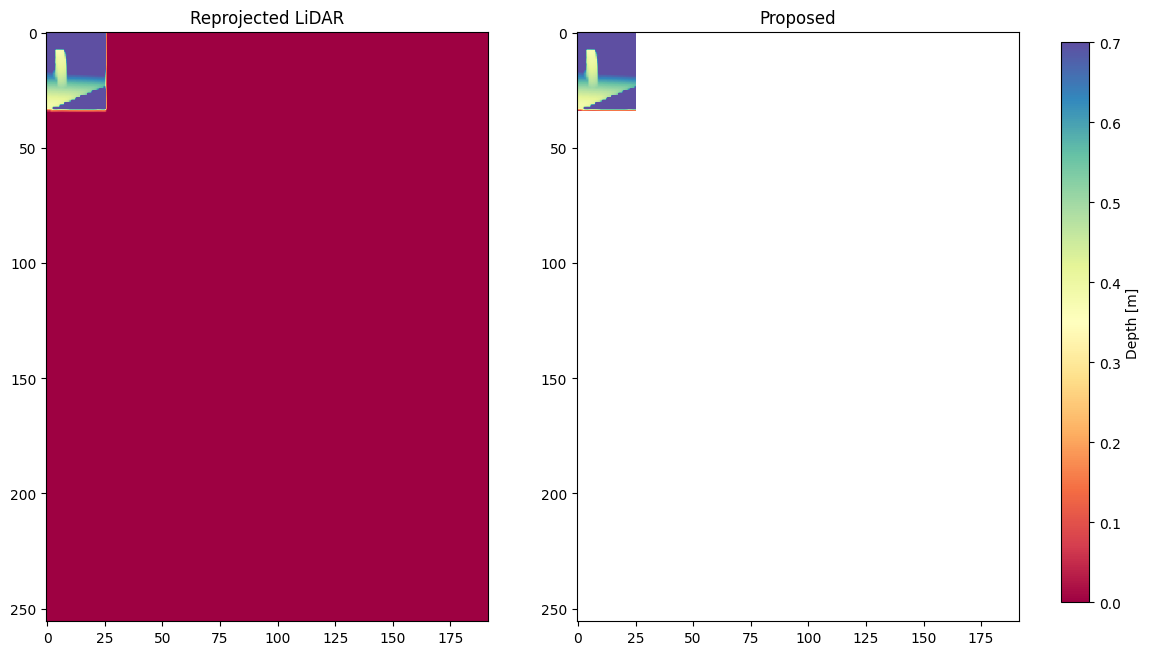

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
axes[0].imshow(qry, cmap='Spectral', vmin=0, vmax=0.7)
axes[0].set_title("Reprojected LiDAR")
im = axes[1].imshow(out, cmap='Spectral', vmin=0, vmax=0.7)
axes[1].set_title("Proposed")

fig.subplots_adjust(right=0.82)
cbar_ax = fig.add_axes([0.85, 0.15, 0.02, 0.7])
fig.colorbar(im, cax=cbar_ax, label='Depth [m]')
plt.show()